<h1><center>Industry Application of Analytics </center></h1>

![](https://media.giphy.com/media/3oKIPEqDGUULpEU0aQ/giphy.gif)

# Topics
1. Introduction to Business Analytics. 
2. Basic Statistics 
3. Exploratory Data Analysis with pandas
4. Data Visualization with Seaborn (optional) 
5. Modelling with python:- 
    - Regression 
        - Linear Regression <------------------------------------------------ **This is where we are**
    - Classification
        - Logistic Regression (We meet again !)
        - Decision Tree
    - Analysing our models
6. Churn Analysis
7. Social Media Analytics
    - Web Scraping
8. Marketing Analytics (maybe !)
9. Time Series Forecasting (maybe maybe !!)
10. Supply Chain Analytics (maybe maybe maybe !!!)

# Linear Regression 

A brush up

In [6]:
# Importing
import numpy as np
import pandas as pd

In [7]:
# Loading the dataset
df = pd.read_csv("datasets/supermarket_sales.csv")

In [8]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [9]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


# Converting Categorical columns to numbers

In [127]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Approach 1 

In [11]:
df.select_dtypes(include=['object'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [12]:
df.select_dtypes(include=['object']).columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [13]:
list_of_categorical_columns =  df.select_dtypes(include=['object']).columns

In [129]:
list_of_categorical_columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [131]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [132]:
len(list_of_categorical_columns)

9

In [133]:
enc.fit_transform(df[list_of_categorical_columns])

<1000x1614 sparse matrix of type '<class 'numpy.float64'>'
	with 9000 stored elements in Compressed Sparse Row format>

In [20]:
enc_df = pd.DataFrame(enc.fit_transform(df[list_of_categorical_columns]).toarray())

In [37]:
enc_df

,0,1,2,3,4,5,6,7,8,9,...,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Approach 2

In [39]:
pd.get_dummies(df[list_of_categorical_columns])

,Invoice ID_101-17-6199,Invoice ID_101-81-4070,Invoice ID_102-06-2002,Invoice ID_102-77-2261,Invoice ID_105-10-6182,Invoice ID_105-31-1824,Invoice ID_106-35-6779,Invoice ID_109-28-2512,Invoice ID_109-86-4363,Invoice ID_110-05-6330,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Invoice is causing a lot of problems, let's remove it

In [40]:
pd.get_dummies(df[['Branch', 'City', 'Customer type', 'Gender','Product line', 'Date', 'Time', 'Payment']])

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,...,Time_20:50,Time_20:51,Time_20:52,Time_20:54,Time_20:55,Time_20:57,Time_20:59,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
996,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
997,1,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
998,1,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


But, how will we know what will cause problems and what will not ?

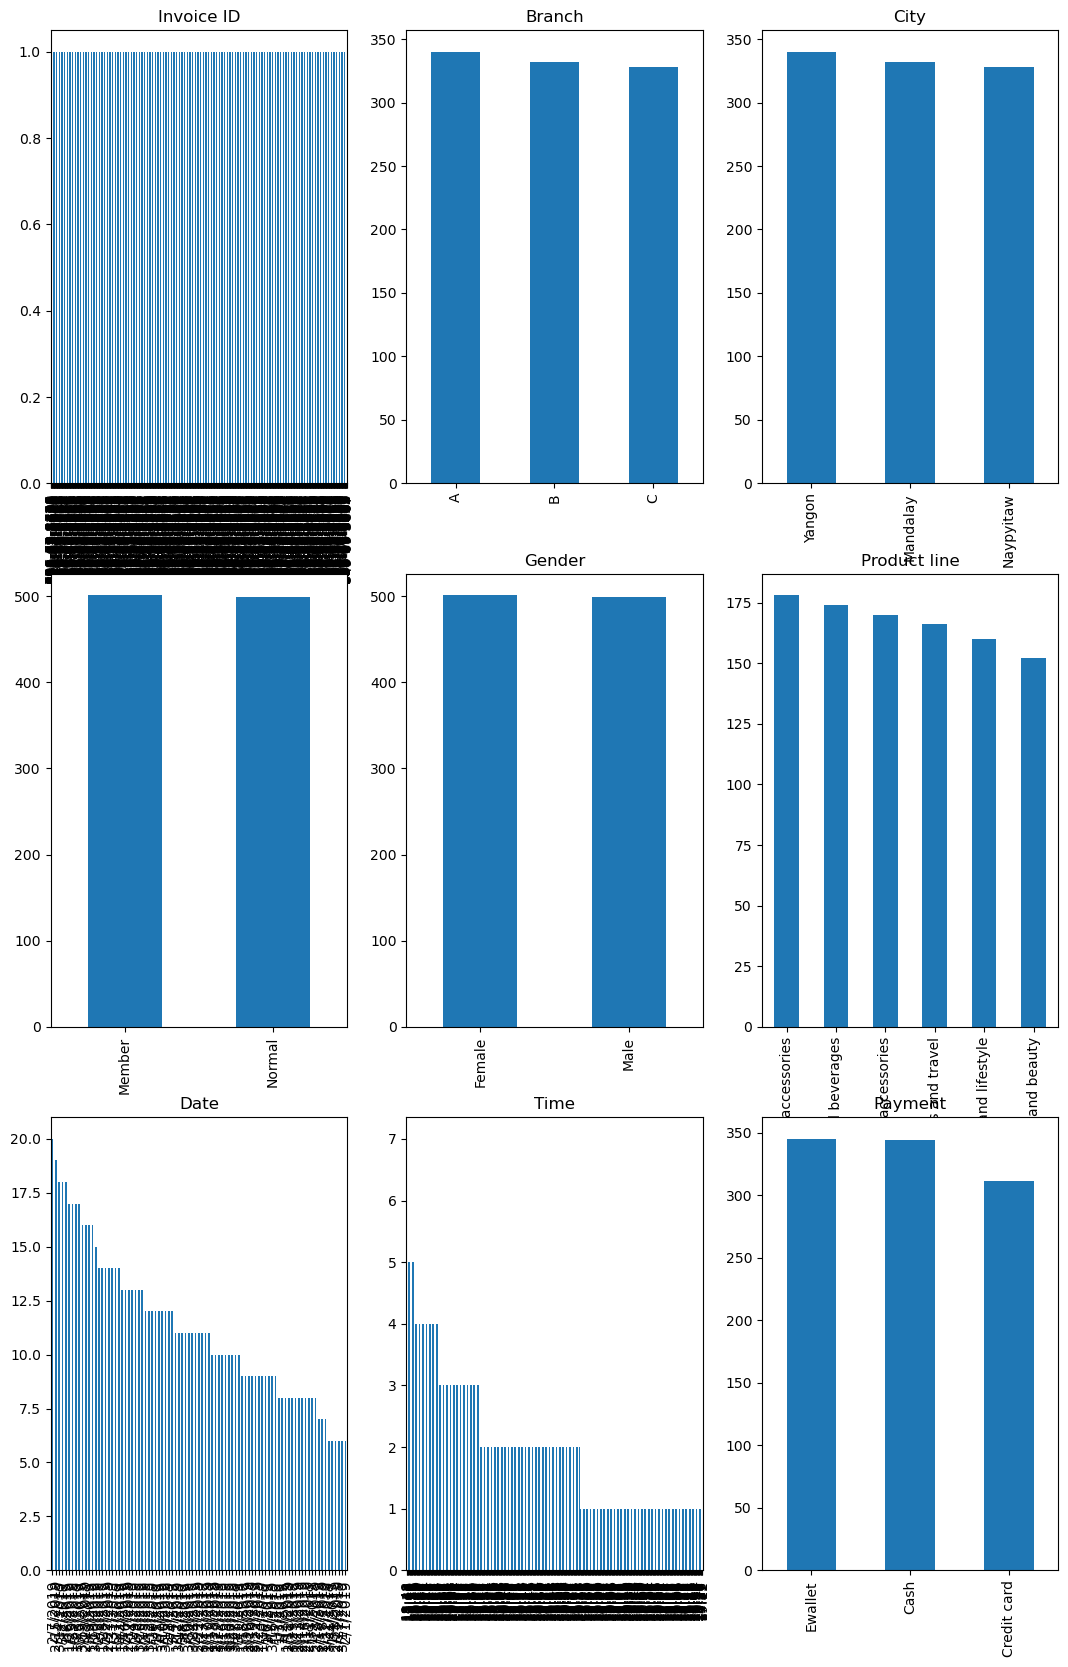

In [44]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 3)
fig.set_figheight(20)
fig.set_figwidth(13)


for i in range(len(list_of_categorical_columns)):
    plt.subplot(3, 3, i+1)
    df[list_of_categorical_columns[i]].value_counts().plot(kind='bar', title=f'{list_of_categorical_columns[i]}')


plt.show()

I can find the columns that i would absolutely like to ignore. 
- ```Invoice ID ```
- ``` Date ```
- ```Time ```

In [47]:
list_of_categorical_columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Date', 'Time', 'Payment'],
      dtype='object')

In [48]:
new_list_of_cat_col = ['Branch', 'City', 'Customer type', 'Gender','Product line', 'Payment']

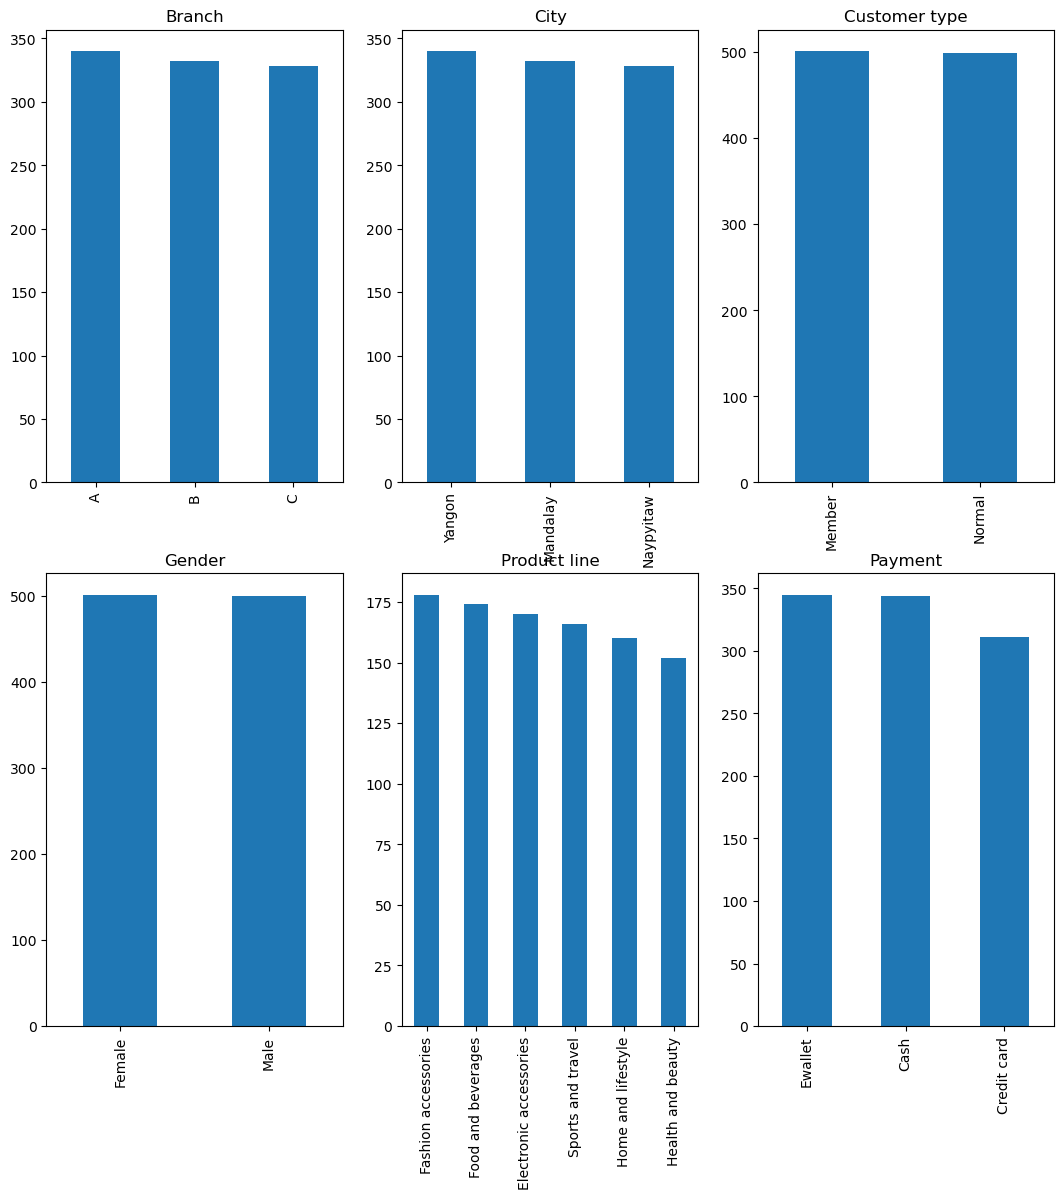

In [51]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3)
fig.set_figheight(20)
fig.set_figwidth(13)


for i in range(len(new_list_of_cat_col)):
    plt.subplot(3, 3, i+1)
    df[new_list_of_cat_col[i]].value_counts().plot(kind='bar', title=f'{new_list_of_cat_col[i]}')


plt.show()

# Now, let's dummy encode

In [134]:
pd.get_dummies(df[new_list_of_cat_col])

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
996,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
997,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
998,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0


In [53]:
df_cat = pd.get_dummies(df[new_list_of_cat_col])

In [54]:
df_cat

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1
996,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1
997,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0
998,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0


# Now, we are done with the categorical columns, let's deal with the numerical ones.

In [136]:
# Something

### All our categories have now been encoded into numbers

In [82]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,153,2,1,1,1,3,40.35,1,2.0175,42.3675,21,174,2,40.35,4.761905,2.0175,6.2
996,250,1,0,1,0,4,97.38,10,48.6900,1022.4900,70,342,2,973.80,4.761905,48.6900,4.4
997,767,0,2,0,1,2,31.84,1,1.5920,33.4320,58,154,0,31.84,4.761905,1.5920,7.7
998,308,0,2,1,1,4,65.82,1,3.2910,69.1110,45,261,0,65.82,4.761905,3.2910,4.1


In [63]:
df[list_of_categorical_columns]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [64]:
df.columns 

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Getting all my numerical columns

In [65]:
list(set(list(df.columns)) - set(list_of_categorical_columns))

['Unit price',
 'gross income',
 'gross margin percentage',
 'Total',
 'Quantity',
 'Rating',
 'Tax 5%',
 'cogs']

In [66]:
numerical_columns = list(set(list(df.columns)) - set(list_of_categorical_columns))

In [67]:
numerical_columns

['Unit price',
 'gross income',
 'gross margin percentage',
 'Total',
 'Quantity',
 'Rating',
 'Tax 5%',
 'cogs']

In [70]:
df[numerical_columns]

,Unit price,gross income,gross margin percentage,Total,Quantity,Rating,Tax 5%,cogs
0,74.69,26.1415,4.761905,548.9715,7,9.1,26.1415,522.83
1,15.28,3.8200,4.761905,80.2200,5,9.6,3.8200,76.40
2,46.33,16.2155,4.761905,340.5255,7,7.4,16.2155,324.31
3,58.22,23.2880,4.761905,489.0480,8,8.4,23.2880,465.76
4,86.31,30.2085,4.761905,634.3785,7,5.3,30.2085,604.17
...,...,...,...,...,...,...,...,...
995,40.35,2.0175,4.761905,42.3675,1,6.2,2.0175,40.35
996,97.38,48.6900,4.761905,1022.4900,10,4.4,48.6900,973.80
997,31.84,1.5920,4.761905,33.4320,1,7.7,1.5920,31.84
998,65.82,3.2910,4.761905,69.1110,1,4.1,3.2910,65.82


In [71]:
df_numeric = df[numerical_columns]

# Joining my numerical column with my encoded columns

In [73]:
# My categorical df
df_cat

# My numeric df
df_numeric

,Unit price,gross income,gross margin percentage,Total,Quantity,Rating,Tax 5%,cogs
0,74.69,26.1415,4.761905,548.9715,7,9.1,26.1415,522.83
1,15.28,3.8200,4.761905,80.2200,5,9.6,3.8200,76.40
2,46.33,16.2155,4.761905,340.5255,7,7.4,16.2155,324.31
3,58.22,23.2880,4.761905,489.0480,8,8.4,23.2880,465.76
4,86.31,30.2085,4.761905,634.3785,7,5.3,30.2085,604.17
...,...,...,...,...,...,...,...,...
995,40.35,2.0175,4.761905,42.3675,1,6.2,2.0175,40.35
996,97.38,48.6900,4.761905,1022.4900,10,4.4,48.6900,973.80
997,31.84,1.5920,4.761905,33.4320,1,7.7,1.5920,31.84
998,65.82,3.2910,4.761905,69.1110,1,4.1,3.2910,65.82


In [74]:
df_cat.join(df_numeric)

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,...,Payment_Credit card,Payment_Ewallet,Unit price,gross income,gross margin percentage,Total,Quantity,Rating,Tax 5%,cogs
0,1,0,0,0,0,1,1,0,1,0,...,0,1,74.69,26.1415,4.761905,548.9715,7,9.1,26.1415,522.83
1,0,0,1,0,1,0,0,1,1,0,...,0,0,15.28,3.8200,4.761905,80.2200,5,9.6,3.8200,76.40
2,1,0,0,0,0,1,0,1,0,1,...,1,0,46.33,16.2155,4.761905,340.5255,7,7.4,16.2155,324.31
3,1,0,0,0,0,1,1,0,0,1,...,0,1,58.22,23.2880,4.761905,489.0480,8,8.4,23.2880,465.76
4,1,0,0,0,0,1,0,1,0,1,...,0,1,86.31,30.2085,4.761905,634.3785,7,5.3,30.2085,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,0,1,...,0,1,40.35,2.0175,4.761905,42.3675,1,6.2,2.0175,40.35
996,0,1,0,1,0,0,0,1,1,0,...,0,1,97.38,48.6900,4.761905,1022.4900,10,4.4,48.6900,973.80
997,1,0,0,0,0,1,1,0,0,1,...,0,0,31.84,1.5920,4.761905,33.4320,1,7.7,1.5920,31.84
998,1,0,0,0,0,1,0,1,0,1,...,0,0,65.82,3.2910,4.761905,69.1110,1,4.1,3.2910,65.82


In [137]:
combined_df = df_cat.join(df_numeric)

In [139]:
combined_df

,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,Gender_Female,Gender_Male,...,Payment_Credit card,Payment_Ewallet,Unit price,gross income,gross margin percentage,Total,Quantity,Rating,Tax 5%,cogs
0,1,0,0,0,0,1,1,0,1,0,...,0,1,74.69,26.1415,4.761905,548.9715,7,9.1,26.1415,522.83
1,0,0,1,0,1,0,0,1,1,0,...,0,0,15.28,3.8200,4.761905,80.2200,5,9.6,3.8200,76.40
2,1,0,0,0,0,1,0,1,0,1,...,1,0,46.33,16.2155,4.761905,340.5255,7,7.4,16.2155,324.31
3,1,0,0,0,0,1,1,0,0,1,...,0,1,58.22,23.2880,4.761905,489.0480,8,8.4,23.2880,465.76
4,1,0,0,0,0,1,0,1,0,1,...,0,1,86.31,30.2085,4.761905,634.3785,7,5.3,30.2085,604.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,1,0,1,...,0,1,40.35,2.0175,4.761905,42.3675,1,6.2,2.0175,40.35
996,0,1,0,1,0,0,0,1,1,0,...,0,1,97.38,48.6900,4.761905,1022.4900,10,4.4,48.6900,973.80
997,1,0,0,0,0,1,1,0,0,1,...,0,0,31.84,1.5920,4.761905,33.4320,1,7.7,1.5920,31.84
998,1,0,0,0,0,1,0,1,0,1,...,0,0,65.82,3.2910,4.761905,69.1110,1,4.1,3.2910,65.82


In [140]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Splitting data for training and testing

In [78]:
from sklearn.model_selection import train_test_split

In [81]:
x = combined_df.drop('Rating',axis=1)
y = combined_df['Rating']

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [83]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


# Fitting the model

In [84]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [104]:
# Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [105]:
# Predicting the Salary for the Test values
y_train_pred = lr.predict(x_train)

In [87]:
# Predicting the Salary for the Test values
y_pred = lr.predict(x_test)

# Plotting the predictions for training data

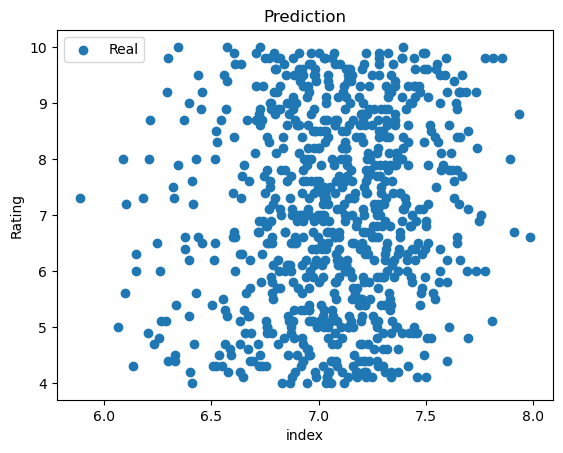

In [112]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.scatter(y_train_pred,y_train)


# Function add a legend  
plt.legend(["Real", "Predicted"])

# Plotting the predictions

In [108]:
len(y_test)

200

In [109]:
len(y_pred)

200

In [110]:
x_range = [i for i in range(len(y_test))]

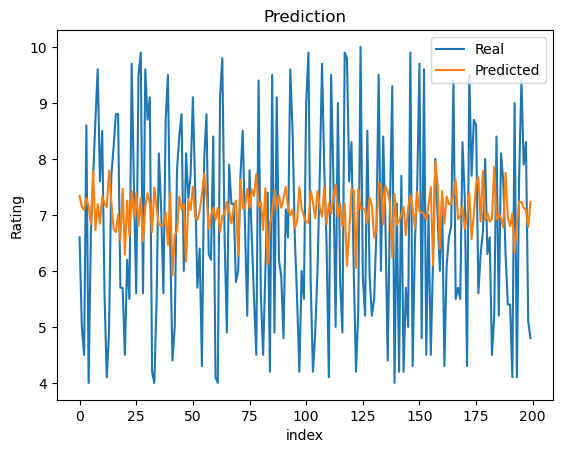

In [111]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred)

# Function add a legend  
plt.legend(["Real", "Predicted"])

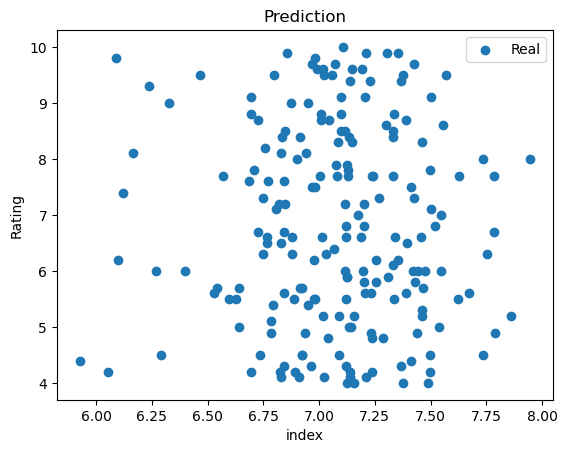

In [113]:
plt.xlabel('index')
plt.ylabel('Rating')
plt.title('Prediction')

plt.scatter(y_pred,y_test)


# Function add a legend  
plt.legend(["Real", "Predicted"])

# Looking at the score

In [92]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [93]:
# calculate Mean square error
mean_squared_error(y_test,y_pred)

3.338690457086265

In [94]:
mse = mean_squared_error(y_test,y_pred)

In [95]:
# Calculate R square vale
r2_score(y_test,y_pred)

-0.07679623808377811

In [96]:
rsq = r2_score(y_test,y_pred)

In [97]:
print('mean squared error :',mse)
print('r square :',rsq)

mean squared error : 3.338690457086265
r square : -0.07679623808377811


In [98]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: -209642466751.357
Coefficient of the line: [ 1.24015728e-02  4.97279009e+11  1.13049202e+11 -2.93532918e+11
  9.06968893e+10  2.03746091e+11  3.19676399e+09  3.19676399e+09
  3.05346992e+08  3.05346992e+08  5.41302377e+09  5.41302377e+09
  5.41302377e+09  5.41302377e+09  5.41302377e+09  5.41302377e+09
 -3.01875883e+09 -3.01875883e+09 -3.01875883e+09  1.31940790e-02
 -1.05057287e+10  0.00000000e+00 -1.18513381e+12  1.03841704e-01
 -2.96507634e+10  1.24639833e+12]


# Plotting

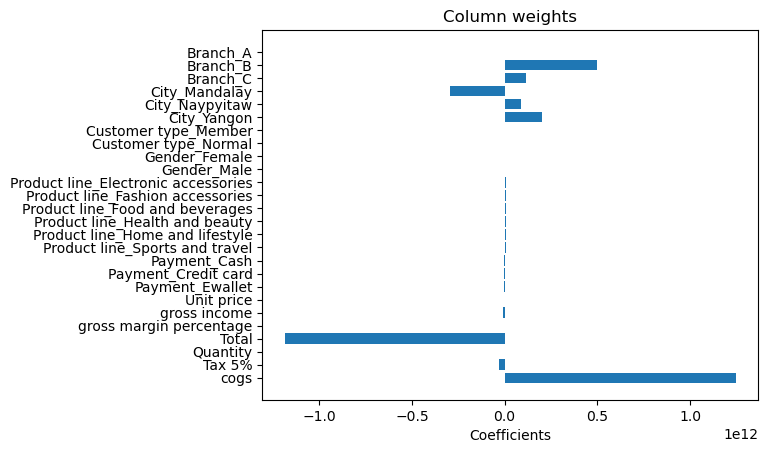

In [126]:
fig, ax = plt.subplots()

ax.barh(list(x_train.columns), list(lr.coef_), align='center')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Coefficients')
ax.set_title('Column weights')

plt.show()

# Time for hands on
Try to predict something else

In [141]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
